# Assessing the final model

In [1]:
import pandas as pd
from eli5.sklearn import PermutationImportance
import joblib 
from Functions import *

In [2]:
buffer_size_m=400

### Load the fitted model

In [3]:
rf_model_pipeline1 = joblib.load('Results/FinalModels/rf_model_pipeline1_{}.pkl'.format(buffer_size_m))
# rf_model_pipeline2 = joblib.load('Results/rf_model_pipeline2_combined_features.fit.sav')
# rf_model_pipeline3 = joblib.load('Results/rf_model_pipeline3_combined_features.fit.sav')

### Load the data used to fit model

In [4]:
Xfull = pd.read_csv('Results/FinalModels/Xfull_rf_model_pipeline1_{}.csv'.format(buffer_size_m))
Yfull = pd.read_csv('Results/FinalModels/Yfull_rf_model_pipeline1_{}.csv'.format(buffer_size_m))
Yfull = Yfull["0"].to_numpy()

### Find Gini impurity feature importances
Gini feature importance (or mean decrease in impurity) counts the number of times a feature is used to split a node, weighted by the number of samples it splits.

In [5]:
gi_1 = find_gini_importance(Xfull,rf_model_pipeline1['rf_regressor'])    
# gi_2 = find_gini_importance(rf_model_pipeline2['rf_regressor'])   
# gi_3 = find_gini_importance(rf_model_pipeline3['rf_regressor'])   

### Find the permutation importances

In [6]:
pi_1, pi_1_raw = find_permutation_importance(rf_model_pipeline1['rf_regressor'], Xfull, Yfull, n_iter=3)    
# pi_2, pi_2_raw = find_permutation_importance(rf_model_pipeline2['rf_regressor'], Xfull, Yfull, n_iter=3)     
# pi_3, pi_3_raw = find_permutation_importance(rf_model_pipeline3['rf_regressor'], Xfull, Yfull, n_iter=3)  

### Plot and compare feature importances

In [7]:
# cardinality_df = pd.DataFrame({'feature':Xfull.columns, 'n_features':Xfull.nunique()})
# cardinality_df = cardinality_df.merge(pi_1, on='feature', how='outer')
# cardinality_df = cardinality_df.drop([0,1,2,4, 45])
# plt.scatter(cardinality_df['n_features'], cardinality_df['importance'])
# # plt.scatter(cardinality_df[:-2]['n_features'], cardinality_df[:-2]['importance'])
# # cardinality_df

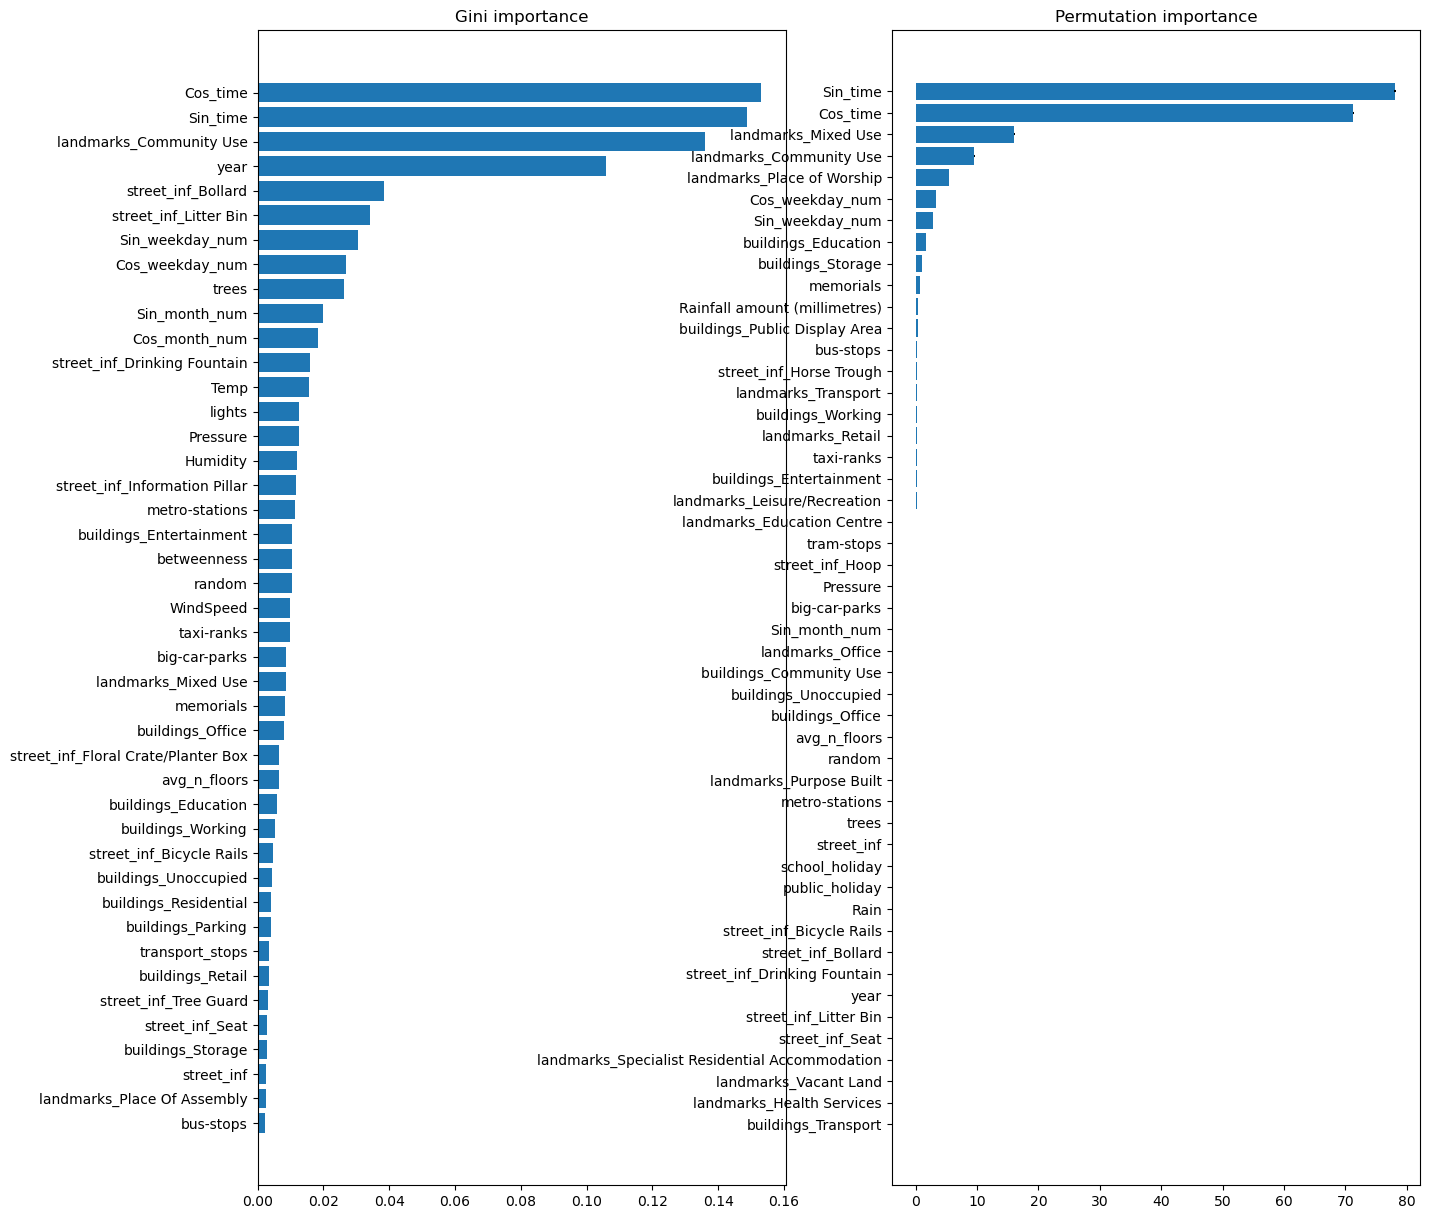

In [10]:
fig, axs = plt.subplots(ncols = 2, figsize=(15,15))
plot_compare_importances(axs, gi_1, pi_1, above_random_cat='random_cat')   
fig.savefig("Results/Figs/AssessingFinalModel/FeatureImportances.PNG")
# fig, axs = plt.subplots(ncols = 2, figsize=(15,8))
# plot_compare_importances(axs, gi_2, pi_2, above_random_cat='random_cat')   

# fig, axs = plt.subplots(ncols = 2, figsize=(15,8))
# plot_compare_importances(axs, gi_3, pi_3, above_random_cat='random_cat')   

Text(0.5, 1.0, 'Permutation importance')

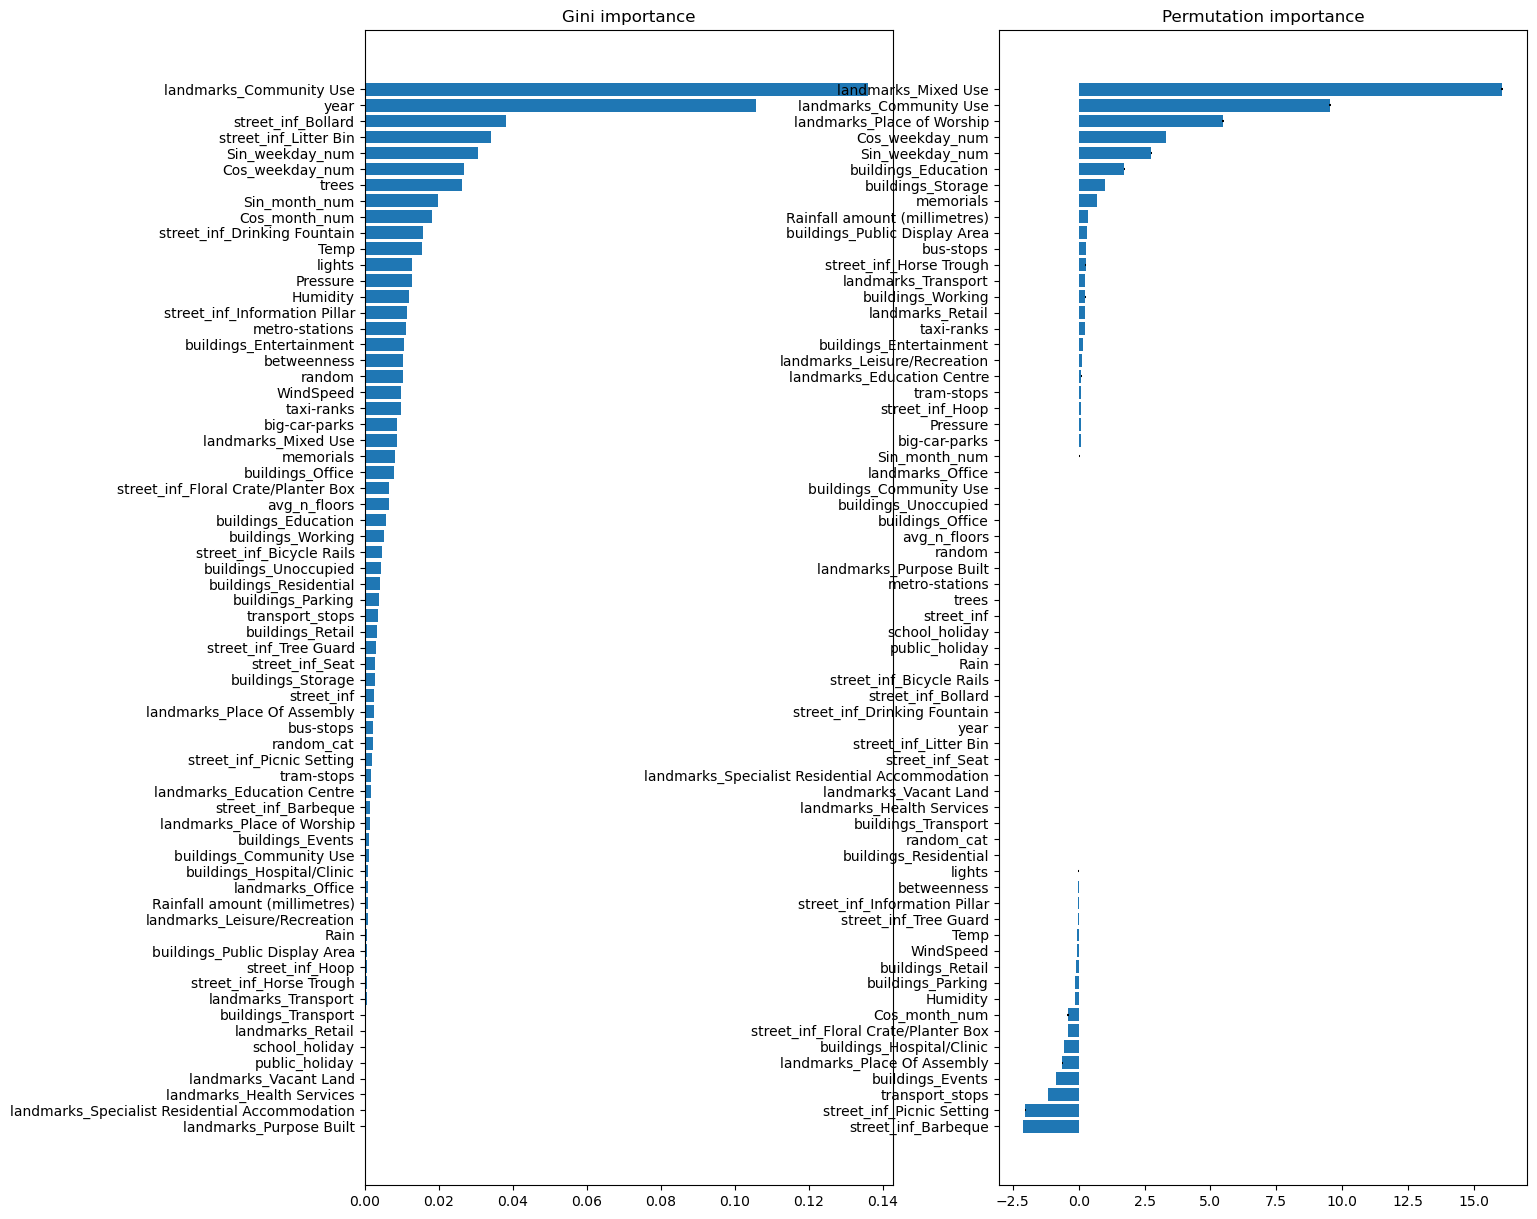

In [17]:
fig, axs = plt.subplots(ncols = 2, figsize=(15,15))
axs[0].barh(range(len(gi_1['importance'][:-2])), gi_1["importance"][:-2])
axs[0].set_yticks(range(len(gi_1["feature"][:-2])))
_ = axs[0].set_yticklabels(np.array(gi_1["feature"][:-2]))
axs[0].set_title('Gini importance')

axs[1].barh(range(len(pi_1['importance'][:-2])),
         pi_1['importance'][:-2],
         xerr=pi_1['Feature_importance_std'][:-2])
axs[1].set_yticks(range(len(pi_1['importance'][:-2])))
_ = axs[1].set_yticklabels(pi_1['feature'][:-2])  
axs[1].set_title('Permutation importance')


In [ ]:
def plot_compare_importances(axs,gini_importances, perm_importances, above_random_cat = False):
    
    if above_random_cat == 'random_num':
        gini_importances = gini_importances[gini_importances['importance']>gini_importances.query("feature=='random'")["importance"].values[0]]
        perm_importances = perm_importances[perm_importances['importance']>perm_importances.query("feature=='random'")["importance"].values[0]]
    elif above_random_cat == 'random_cat':
        gini_importances = gini_importances[gini_importances['importance']>gini_importances.query("feature=='random_cat'")["importance"].values[0]]
        perm_importances = perm_importances[perm_importances['importance']>perm_importances.query("feature=='random_cat'")["importance"].values[0]]
        
    axs[0].barh(range(len(gini_importances['importance'])), gini_importances["importance"])
    axs[0].set_yticks(range(len(gini_importances["feature"])))
    _ = axs[0].set_yticklabels(np.array(gini_importances["feature"]))
    axs[0].set_title('Gini importance')

    axs[1].barh(range(len(perm_importances['importance'])),
             perm_importances['importance'],
             xerr=perm_importances['Feature_importance_std'])
    axs[1].set_yticks(range(len(perm_importances['importance'])))
    _ = axs[1].set_yticklabels(perm_importances['feature'])  
    axs[1].set_title('Permutation importance')


#### Think if score is negative it implies that randomly shuffled version of the variable scored better than the real variable (so doesn't imply improtance)

In [47]:
# fig, ax=plt.subplots(figsize=(10,10))
# ax.barh(range(len(pi_1['importance'])),pi_1['importance'],xerr=pi_1['Feature_importance_std'])
# ax.set_yticks(range(len(pi_1['importance'])))
# _ = ax.set_yticklabels(pi_1['feature'])  
# ax.set_title('Permutation importance');